## Data Analyst Take Home Exercise

### Exercise: 

 You are a data analyst for ASDA Groceries (Walmart's UK subsidiary, https://groceries.asda.com/), looking after the checkout customer experience. A new product manager has started at the company and she asks you to give a short report on the recent performance of the checkout and to give your recommendations on areas of opportunity/concern. You have pulled the attached data from the company’s analytics reporting tool. 

 Background on ASDA Groceries' checkout experience: 

 The company has a 4-step checkout, where every user has to go through each step in order to complete the checkout 

 Step 1 – Before You Go – a page where the user is shown a number of product recommendations based on what they have either previous bought or complementary product to those already in their cart 

 Step 2 – Book A Slot – a page where the user selects the time and day they would like their delivery. Availability and cost of slot here can vary. 

 Step 3 – Select Payment – a page where existing users can select a credit card that was previous used or where new/existing users can add a new credit card to use again an order 

 Step 4 – Order Summary – a page where users can see a summary of their order including order contents, booked slot, payment type and a breakdown of the final cost. This is where a customer places an order 

 For ease of analysis – assume no same user orders more than once in the same day 

### Task: 

  Run some analysis on the data set and present your top 5 findings to the new product manager.  Please see above User checkout experience. Assuming you can get all the data you want: 
 - What would you measure and how will you make decisions from there? 
 - What would be the top 3 metrics to define the success of the product?  
 - What would be the dashboards/report you would build to track those? "										


### Some findings
- Most attributes are positive correlated to revenue, and there is a strong positive correlation (more than 0.95) between those variables.
- Ads with existing customers generate more revenue per advertisement, which means that adding more advertisements with existing customers will leads to higher and more efficient revenue returns.
- Existing customers generate \$ 980157 revenue in total, and \$ 87869 for new customers.
- Desktop users generate \$ 588334 revenue in total, and \$ 479691 for mobile users.
- Home delivery generate \$ 882607 revenue in total, and \$ 185418 for store collection.
- By comparing the revenue for each checkout category, we can find that existing customers with home delivery option for both kind of devices leads to much more revenue than other categories, and desktop users gets the highest.


In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
xls = pd.ExcelFile('International Data Analyst Take Home Excercise 2.xlsx')
data = pd.read_excel(xls, 'Data')
data.head(10)

,Date,Customer Type,Delivery Type,Device Type,Before You Go Unique Daily Users,Before You Go Cart Adds,Before You Go Total Revenue From Cart Adds,Book Slot Unique Daily Users,Select Payment Unique Daily Users,Order Summary Unique Daily Users,Orders,Revenue
0,2017-09-01,Existing,Store Collection,Desktop,4910,1929,3737,4839,4342,4245,4037,379289.0
1,2017-09-01,New,Home Delivery,Desktop,4450,1753,2470,4166,3608,3504,3450,311501.0
2,2017-09-01,New,Store Collection,Desktop,487,148,257,478,452,435,399,36074.0
3,2017-09-01,New,Home Delivery,Mobile,398,103,153,343,272,261,250,17452.0
4,2017-09-01,Existing,Store Collection,Mobile,5159,1750,3356,4785,4242,4059,3855,360265.0
5,2017-09-01,Existing,Home Delivery,Mobile,20008,7045,13190,18655,18014,17221,17027,1608022.0
6,2017-09-01,Existing,Home Delivery,Desktop,20647,7762,15198,19739,19157,18058,17673,1652713.0
7,2017-09-01,New,Store Collection,Mobile,59,15,20,52,50,46,43,3112.0
8,2017-09-02,Existing,Store Collection,Mobile,5022,1788,3194,4828,4058,3854,3800,350621.0
9,2017-09-02,Existing,Home Delivery,Desktop,20362,8168,15373,19382,18631,18446,18023,1711522.0


In [73]:
data.describe()

,Before You Go Unique Daily Users,Before You Go Cart Adds,Before You Go Total Revenue From Cart Adds,Book Slot Unique Daily Users,Select Payment Unique Daily Users,Order Summary Unique Daily Users,Orders,Revenue
count,240.00000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,2.400000e+02
mean,7000.17500,2704.962500,4942.38750,6462.720833,6022.595833,5808.954167,5656.166667,5.340127e+05
std,7932.10195,3058.788102,5780.27406,7393.933768,6998.928277,6749.627692,6603.882424,6.380841e+05
min,58.00000,15.000000,20.00000,44.000000,43.000000,40.000000,31.000000,2.162400e+03
25%,464.75000,137.250000,231.00000,401.000000,358.250000,345.750000,331.000000,2.867243e+04
50%,4732.00000,1841.000000,3030.00000,4242.500000,3786.500000,3664.000000,3515.500000,3.118345e+05
75%,8724.25000,3437.750000,6368.75000,7857.000000,7319.000000,7179.500000,6800.750000,6.156846e+05
max,20988.00000,9354.000000,17302.00000,20242.000000,19344.000000,18680.000000,18425.000000,1.754791e+06


In [74]:
data.corr()

,Before You Go Unique Daily Users,Before You Go Cart Adds,Before You Go Total Revenue From Cart Adds,Book Slot Unique Daily Users,Select Payment Unique Daily Users,Order Summary Unique Daily Users,Orders,Revenue
Before You Go Unique Daily Users,1.000000,0.992819,0.992149,0.997487,0.996612,0.996975,0.996379,0.996666
Before You Go Cart Adds,0.992819,1.000000,0.997746,0.986107,0.987070,0.986405,0.986190,0.989854
Before You Go Total Revenue From Cart Adds,0.992149,0.997746,1.000000,0.985570,0.987321,0.986807,0.986698,0.990473
Book Slot Unique Daily Users,0.997487,0.986107,0.985570,1.000000,0.998943,0.999262,0.999078,0.997616
Select Payment Unique Daily Users,0.996612,0.987070,0.987321,0.998943,1.000000,0.999476,0.998924,0.997966
Order Summary Unique Daily Users,0.996975,0.986405,0.986807,0.999262,0.999476,1.000000,0.999285,0.997773
Orders,0.996379,0.986190,0.986698,0.999078,0.998924,0.999285,1.000000,0.998469
Revenue,0.996666,0.989854,0.990473,0.997616,0.997966,0.997773,0.998469,1.000000


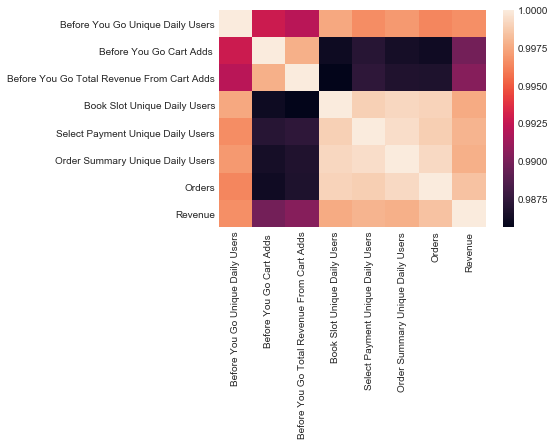

In [75]:
sns.heatmap(data.corr())

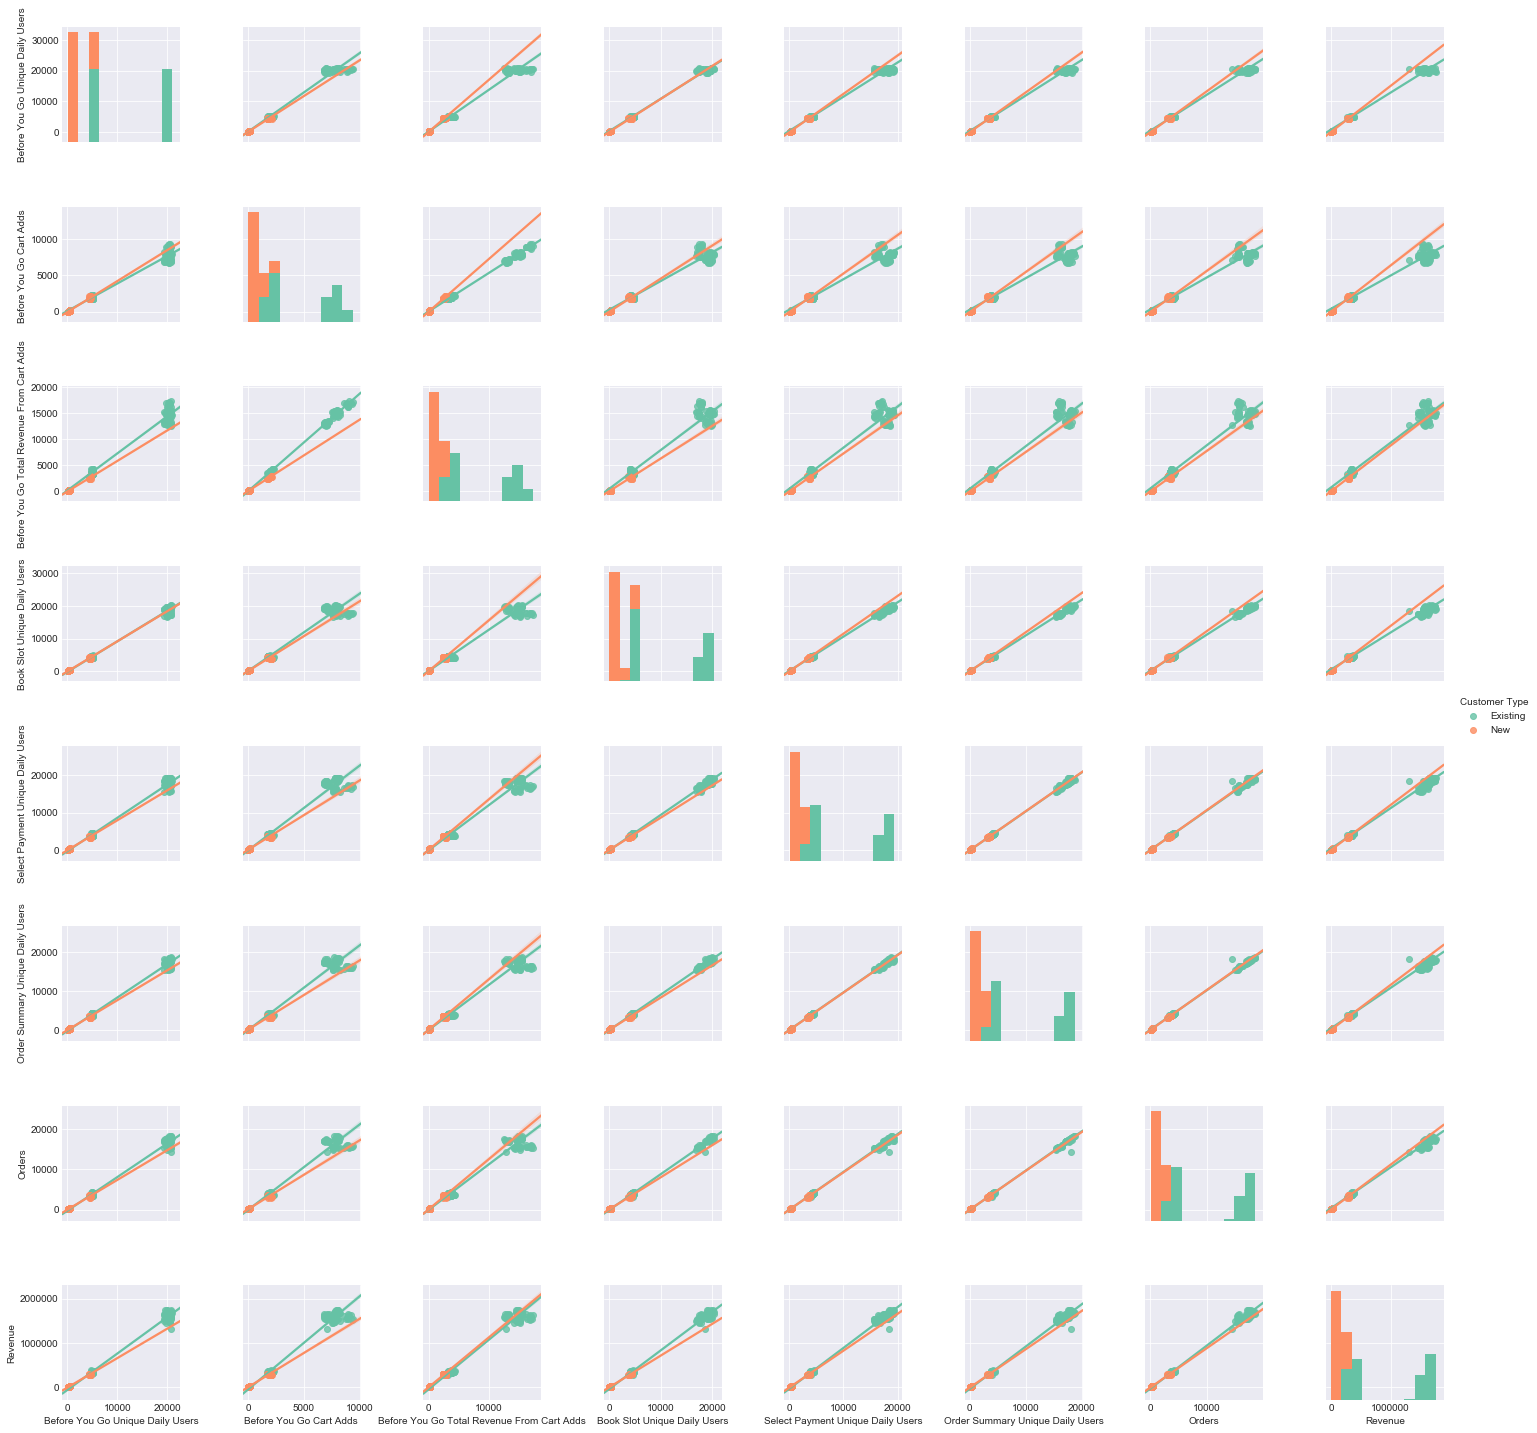

In [76]:
sns.pairplot(data, kind="reg", hue ='Customer Type', palette="Set2")
#plt.show()


In [77]:
groupdata1 = data.groupby(['Customer Type', 'Delivery Type', 'Device Type'])

grouped_revenue = groupdata1['Revenue']
group1 = grouped_revenue.agg('mean')
group1

Customer Type  Delivery Type     Device Type
Existing       Home Delivery     Desktop        1.658839e+06
                                 Mobile         1.557205e+06
               Store Collection  Desktop        3.635355e+05
                                 Mobile         3.410474e+05
New            Home Delivery     Desktop        2.967722e+05
                                 Mobile         1.761318e+04
               Store Collection  Desktop        3.418928e+04
                                 Mobile         2.899935e+03
Name: Revenue, dtype: float64

In [78]:
nameList = []
for i in ['Existing', 'New']:
    for j in ['Home Delivery', 'Store Collection']:
        for k in ['Desktop', 'Mobile']:
            new = i+'/ '+j+'/ '+k
            nameList.append(new)
            

In [79]:
group1data = {'Type':nameList, 'Revenue':list(group1)} 
  
group1data = pd.DataFrame(group1data) 
  
group1data.sort_values(by='Revenue',ascending=False)

,Type,Revenue
0,Existing/ Home Delivery/ Desktop,1.658839e+06
1,Existing/ Home Delivery/ Mobile,1.557205e+06
2,Existing/ Store Collection/ Desktop,3.635355e+05
3,Existing/ Store Collection/ Mobile,3.410474e+05
4,New/ Home Delivery/ Desktop,2.967722e+05
6,New/ Store Collection/ Desktop,3.418928e+04
5,New/ Home Delivery/ Mobile,1.761318e+04
7,New/ Store Collection/ Mobile,2.899935e+03


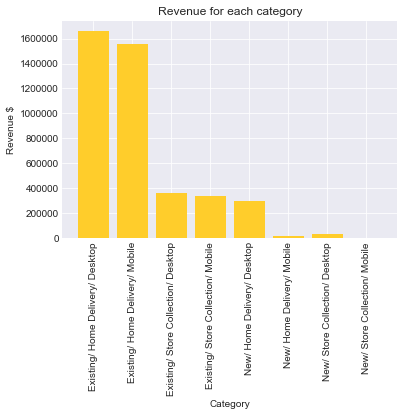

In [80]:
y_pos = np.arange(len(group1data))

plt.bar(y_pos, group1data['Revenue'], color='#ffcd2b')
plt.xticks(y_pos, group1data['Type'],rotation = 90)
plt.title('Revenue for each category')
plt.xlabel('Category')
plt.ylabel('Revenue $')

plt.show()

In [81]:
groupdata2 = data.groupby(['Customer Type'])

grouped_revenue = groupdata2['Revenue']
group2 = grouped_revenue.agg('mean')
group2

Customer Type
Existing    980156.742333
New          87868.653833
Name: Revenue, dtype: float64

In [82]:
(group2[0]-group2[1])/group2[1]*100

1015.4794111133938

In [83]:
groupdata3 = data.groupby(['Delivery Type'])

grouped_revenue = groupdata3['Revenue']
group3 = grouped_revenue.agg('mean')
group3

Delivery Type
Home Delivery       882607.362500
Store Collection    185418.033667
Name: Revenue, dtype: float64

In [84]:
(group3[0]-group3[1])/group3[1]*100

376.0094501307774

In [85]:
groupdata4 = data.groupby(['Device Type'])

grouped_revenue = groupdata4['Revenue']
group4 = grouped_revenue.agg('mean')
group4

Device Type
Desktop     588333.977833
Mobile      479691.418333
Name: Revenue, dtype: float64

In [86]:
data['RevenuePerAds'] = data['Before You Go Total Revenue From Cart Adds']/data['Before You Go Cart Adds ']

In [87]:
groupdata5 = data.groupby(['Customer Type', 'Delivery Type', 'Device Type'])

grouped_revenue = groupdata5['RevenuePerAds']
group5 = grouped_revenue.agg('mean')
group5

Customer Type  Delivery Type     Device Type
Existing       Home Delivery     Desktop        1.877574
                                 Mobile         1.871765
               Store Collection  Desktop        1.898043
                                 Mobile         1.837435
New            Home Delivery     Desktop        1.385390
                                 Mobile         1.496110
               Store Collection  Desktop        1.732032
                                 Mobile         1.339869
Name: RevenuePerAds, dtype: float64